# Logistic Regression - Predict people who will purchase based on age and salary

# Directories, Libraries and Data

In [1]:
%cd C:/users/shrav/Data_Analysis_Projects/Datasets/Logistic Regression

C:\users\shrav\Data_Analysis_Projects\Datasets\Logistic Regression


In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Data 
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.describe().round(2)

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


## Feature Distribution

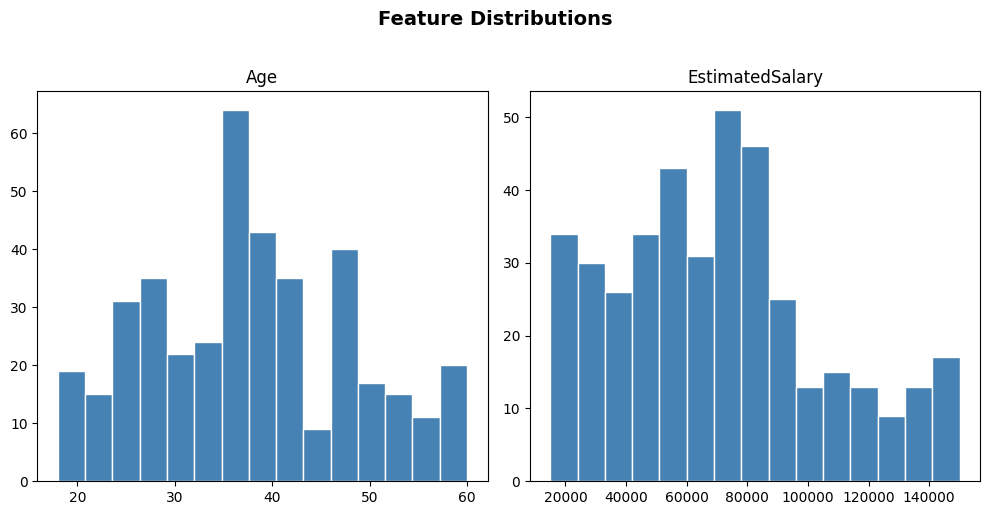

In [6]:
# Create the histogram with improved styling
ax = df.drop('Purchased', axis=1).hist(figsize=(10, 5), 
                                     color='steelblue', 
                                     edgecolor='white', 
                                     grid=False,
                                     bins=15)

# Add overall title
plt.suptitle('Feature Distributions', y=1.02, fontsize=14, fontweight='bold')

# Adjust layout to prevent title overlap
plt.tight_layout()
    
plt.show()

## Check for outliers

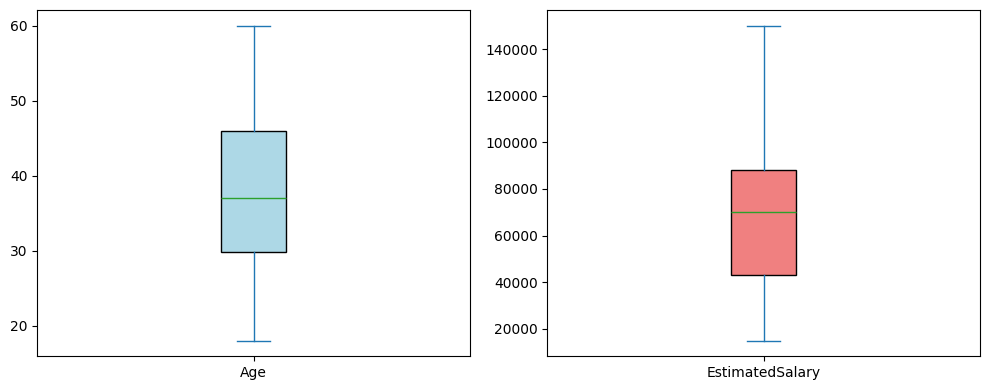

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df['Age'].plot(kind='box', ax=ax[0], patch_artist=True, 
               boxprops=dict(facecolor='lightblue'))
df['EstimatedSalary'].plot(kind='box', ax=ax[1], patch_artist=True,
                         boxprops=dict(facecolor='lightcoral'))

plt.tight_layout()
plt.show()

## Avg values of different fields based on the target field

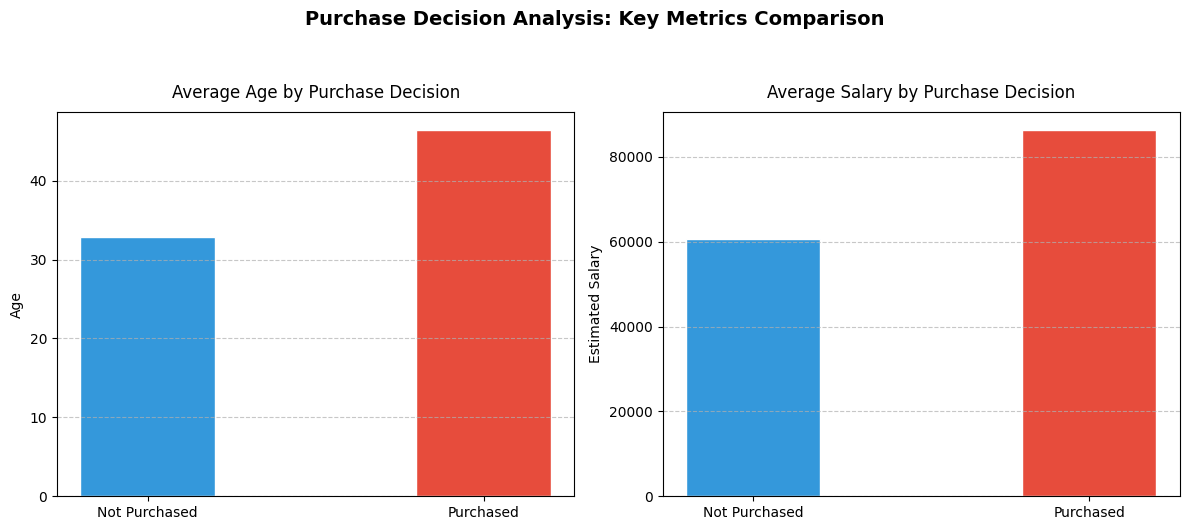

In [8]:
# Group by 'Purchased' and calculate means
grouped = df.groupby('Purchased')[['Age', 'EstimatedSalary']].mean()

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot settings
bar_width = 0.4
colors = ['#3498db', '#e74c3c']  # Blue and red
x_labels = ['Not Purchased', 'Purchased']  # Assuming 0=Not Purchased, 1=Purchased
x_pos = np.arange(len(x_labels))

# Plot 1: Average Age
ax1.bar(x_pos, grouped['Age'], width=bar_width, color=colors, edgecolor='white')
ax1.set_title('Average Age by Purchase Decision', fontsize=12, pad=10)
ax1.set_ylabel('Age', fontsize=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_labels)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Average Salary
ax2.bar(x_pos, grouped['EstimatedSalary'], width=bar_width, color=colors, edgecolor='white')
ax2.set_title('Average Salary by Purchase Decision', fontsize=12, pad=10)
ax2.set_ylabel('Estimated Salary', fontsize=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(x_labels)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Main title
fig.suptitle('Purchase Decision Analysis: Key Metrics Comparison', y=1.05, 
             fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

**On avg people with higher salary and higher age purchase more**

## check for correlation 

<Axes: >

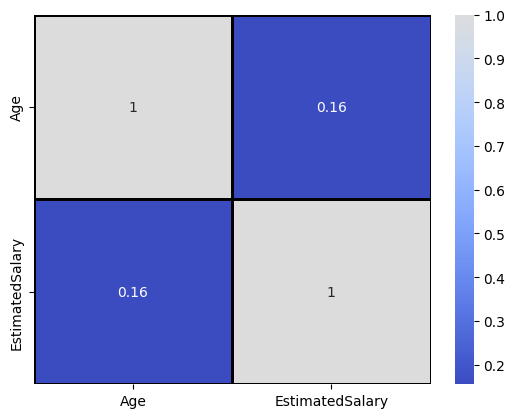

In [9]:
sns.heatmap(df.drop('Purchased', axis=1).corr(),
           center=True,
           cmap='coolwarm',
           fmt='.2g',
           linecolor='black',
           linewidths=1,
           annot=True)

**No multicolinearity**

# Logistic Regression Prep

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X[: 4]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000]], dtype=int64)

# Test train split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling

Since the 'EstimatedSalary' column (mean $\approx$  69,000) and the 'Age' column (mean  37) are on drastically different scales, we should perform feature scaling. Without scaling, machine learning models might disproportionately weight 'EstimatedSalary' over 'Age' due to its larger numerical range, potentially reducing model performance.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape

(100, 2)

In [13]:
X_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

# Prepping the model

In [14]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Prediction

In [15]:
y_pred = classifier.predict(X_test)
y_pred[: 4]

array([0, 0, 0, 0], dtype=int64)

# Confusion Matrix

In [16]:
print(confusion_matrix(y_test, y_pred))

[[65  3]
 [ 8 24]]


# Classification Report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



# Visualization

## For training set 

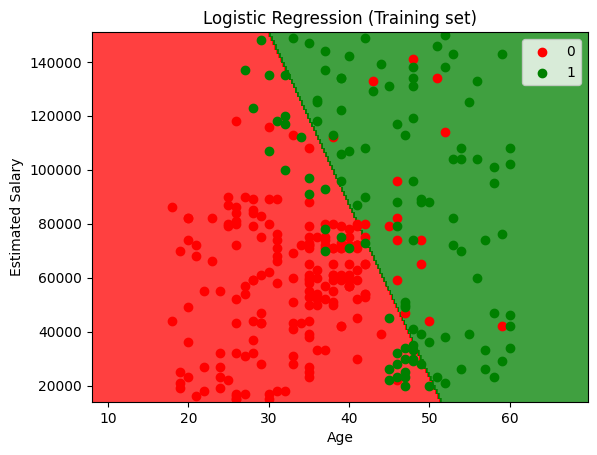

In [18]:
from matplotlib.colors import ListedColormap

# reverse the scalar transform we did before 
X_set, y_set = sc.inverse_transform(X_train), y_train

# Creates a grid of points to evaluate the classifier across the feature space
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# ills regions where predictions are 0 (red) or 1 (green) with transparency (alpha=0.75).
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# set axis limits to match the mesh grid.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(colors=('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## For test set

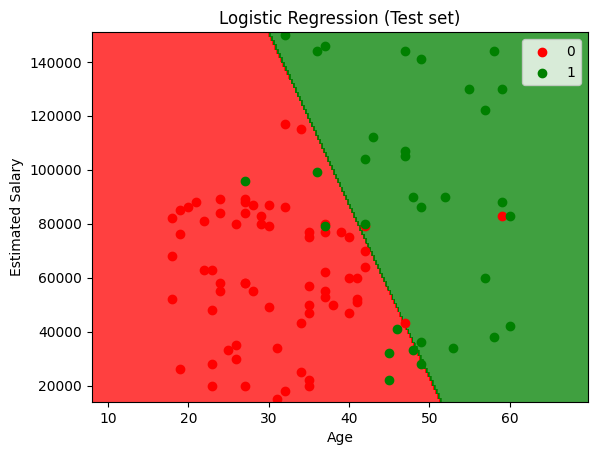

In [19]:
# from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()